In [11]:
# Import modules
import sys
sys.path.append('../scripts') 

In [12]:
from data_fetch import fetch_data
from data_preprocessing import preprocess_data, describe_data
from eda import plot_closing_price, plot_daily_returns
from risk_analysis import calculate_var, calculate_sharpe_ratio

In [13]:
# Set parameters
tickers = ['TSLA', 'BND', 'SPY']
start_date = "2015-01-01"
end_date = "2024-10-31"

In [14]:
# Fetch data
data = fetch_data(tickers, start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [15]:
# Preprocess and describe data
for ticker, df in data.items():
    data[ticker] = preprocess_data(df)
    print(f"Basic statistics for {ticker}:\n", describe_data(df))

Basic statistics for TSLA:
 Price     Adj Close        Close         High          Low         Open  \
Ticker         TSLA         TSLA         TSLA         TSLA         TSLA   
count   2474.000000  2474.000000  2474.000000  2474.000000  2474.000000   
mean     111.438965   111.438965   113.895836   108.869421   111.461872   
std      110.120450   110.120450   112.643277   107.541830   110.208156   
min        9.578000     9.578000    10.331333     9.403333     9.488000   
25%       17.066167    17.066167    17.368167    16.790167    17.058499   
50%       25.043000    25.043000    25.279000    24.462334    24.986667   
75%      216.865002   216.865002   221.910004   212.084999   217.264999   
max      409.970001   409.970001   414.496674   405.666656   411.470001   

Price         Volume  
Ticker          TSLA  
count   2.474000e+03  
mean    1.125745e+08  
std     7.449619e+07  
min     1.062000e+07  
25%     6.682590e+07  
50%     9.289395e+07  
75%     1.301899e+08  
max     9.1408

/home/kali/Desktop/Time-Series-Forecasting-for-Portfolio/notebooks/../scripts/data_preprocessing.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Fill missing values
/home/kali/Desktop/Time-Series-Forecasting-for-Portfolio/notebooks/../scripts/data_preprocessing.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Fill missing values
/home/kali/Desktop/Time-Series-Forecasting-for-Portfolio/notebooks/../scripts/data_preprocessing.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Fill missing values


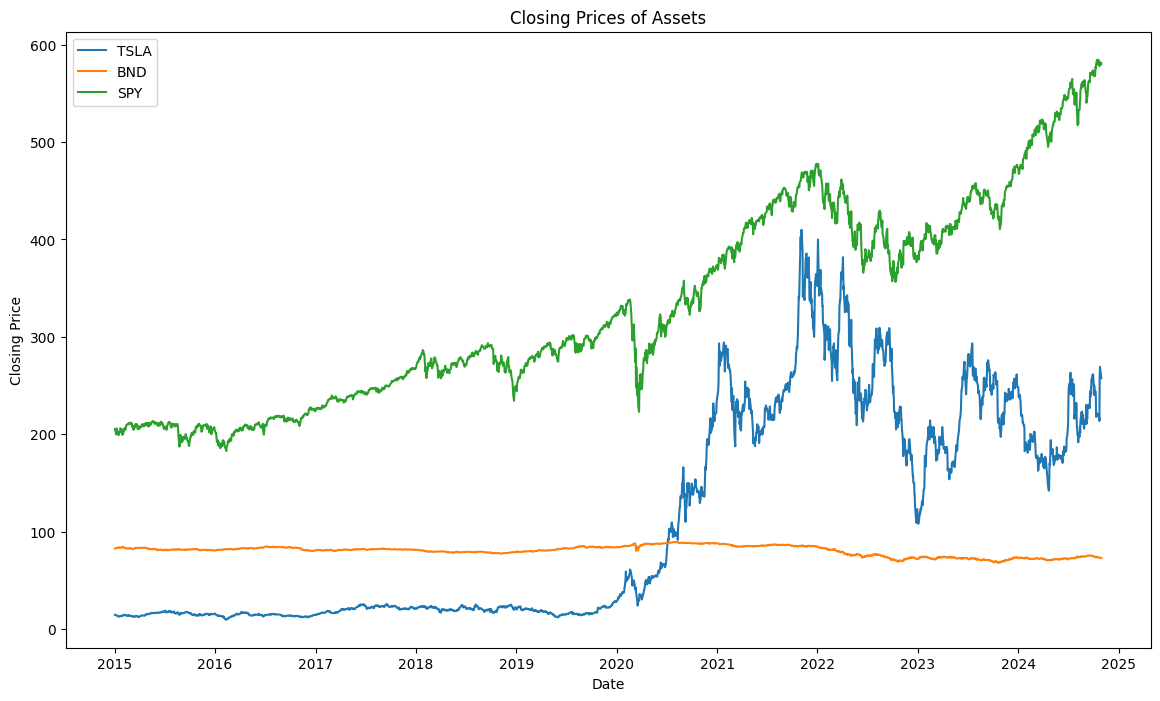

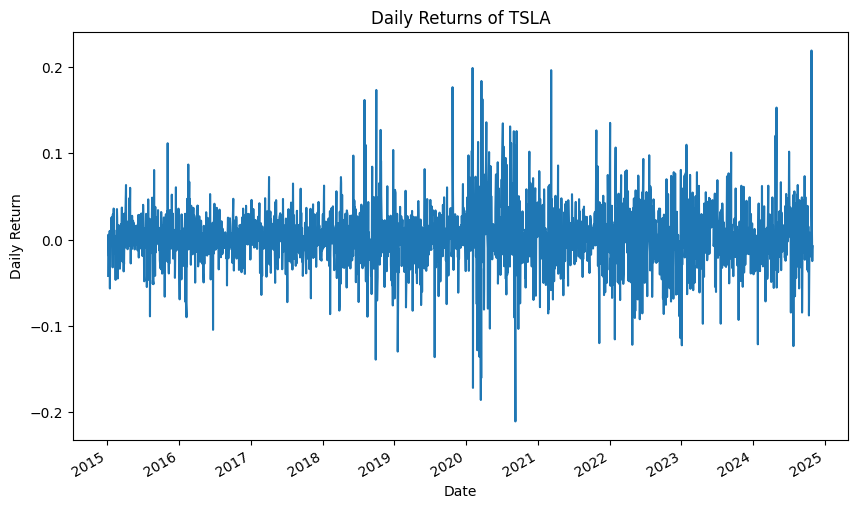

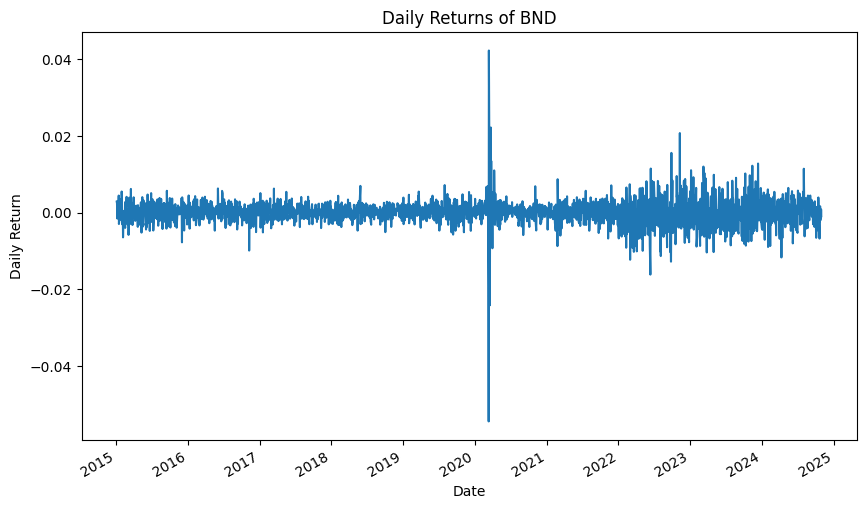

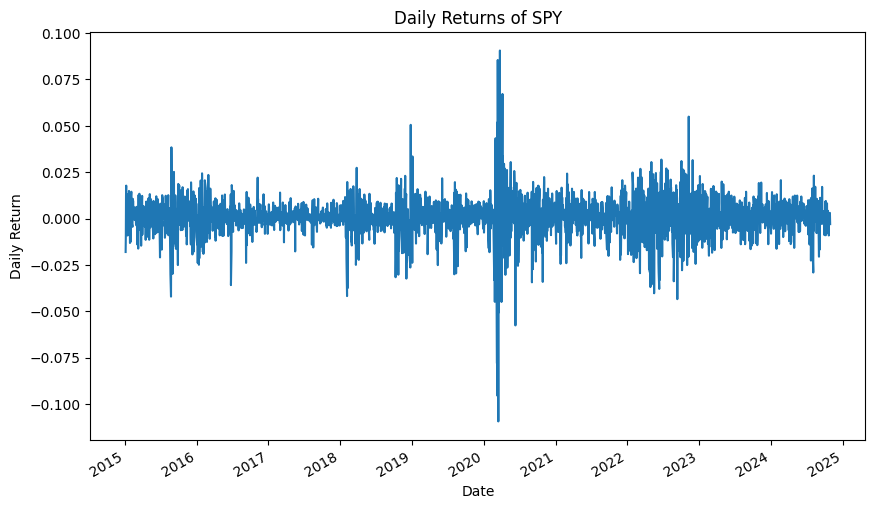

In [16]:
# Perform EDA
plot_closing_price(data)

for ticker, df in data.items():
    plot_daily_returns(df, ticker)

In [ ]:
# Calculate risk metrics for each asset
for ticker, df in data.items():
    # Calculate Daily Return
    df['Daily Return'] = df['Adj Close'].pct_change()
    df.dropna(subset=['Daily Return'], inplace=True)  # Drop NaN values in 'Daily Return'
    
    # Calculate VaR and Sharpe Ratio only after handling NaN
    var = calculate_var(df)
    sharpe_ratio = calculate_sharpe_ratio(df)
    
    print(f"Risk Metrics for {ticker}:\nVaR: {var}\nSharpe Ratio: {sharpe_ratio}\n")

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

/tmp/ipykernel_50549/384456375.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['Adj Close'].resample('M').mean()  # Adjust as needed for your frequency


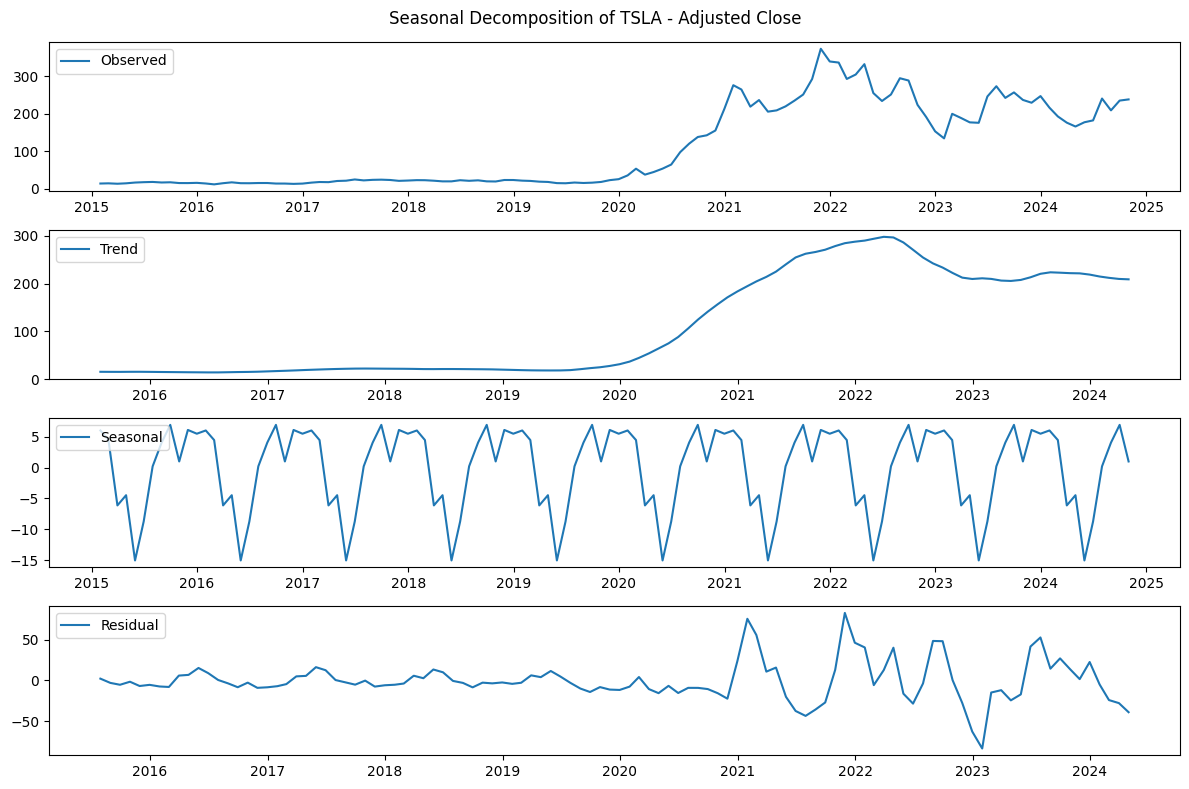

/tmp/ipykernel_50549/384456375.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['Adj Close'].resample('M').mean()  # Adjust as needed for your frequency


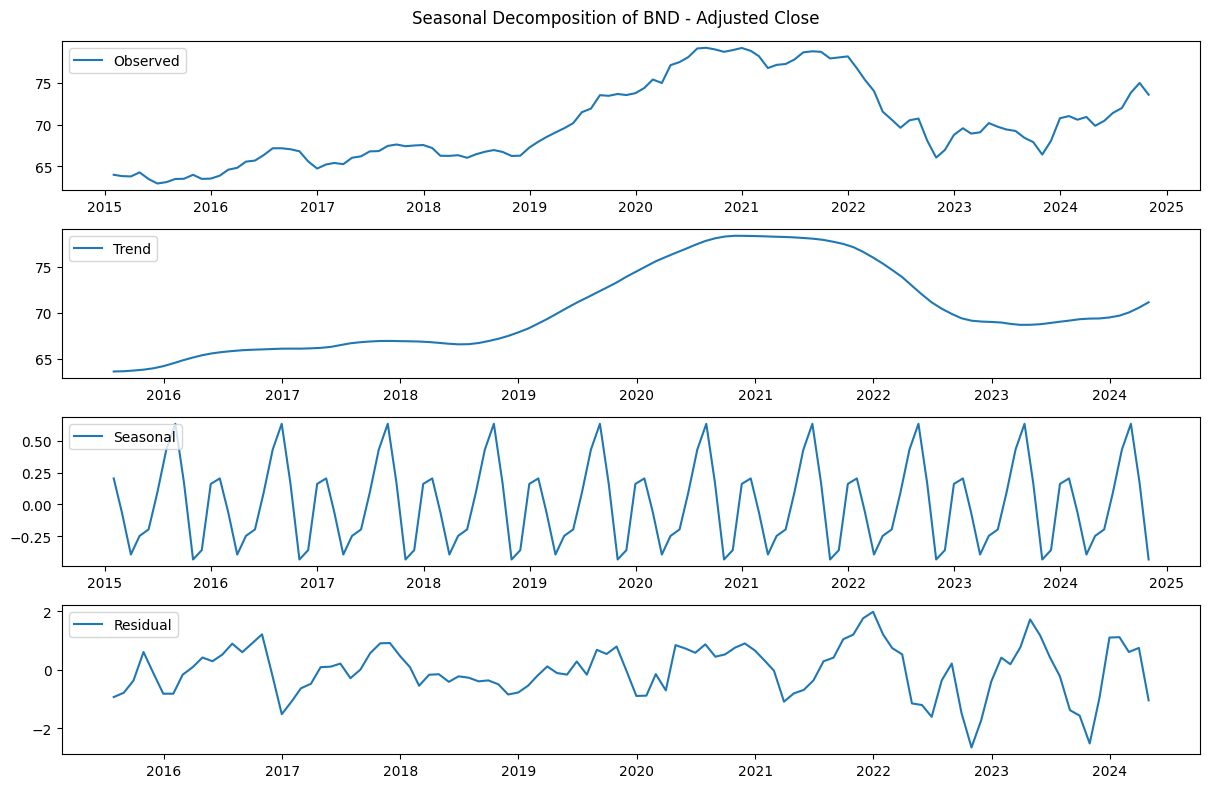

/tmp/ipykernel_50549/384456375.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['Adj Close'].resample('M').mean()  # Adjust as needed for your frequency


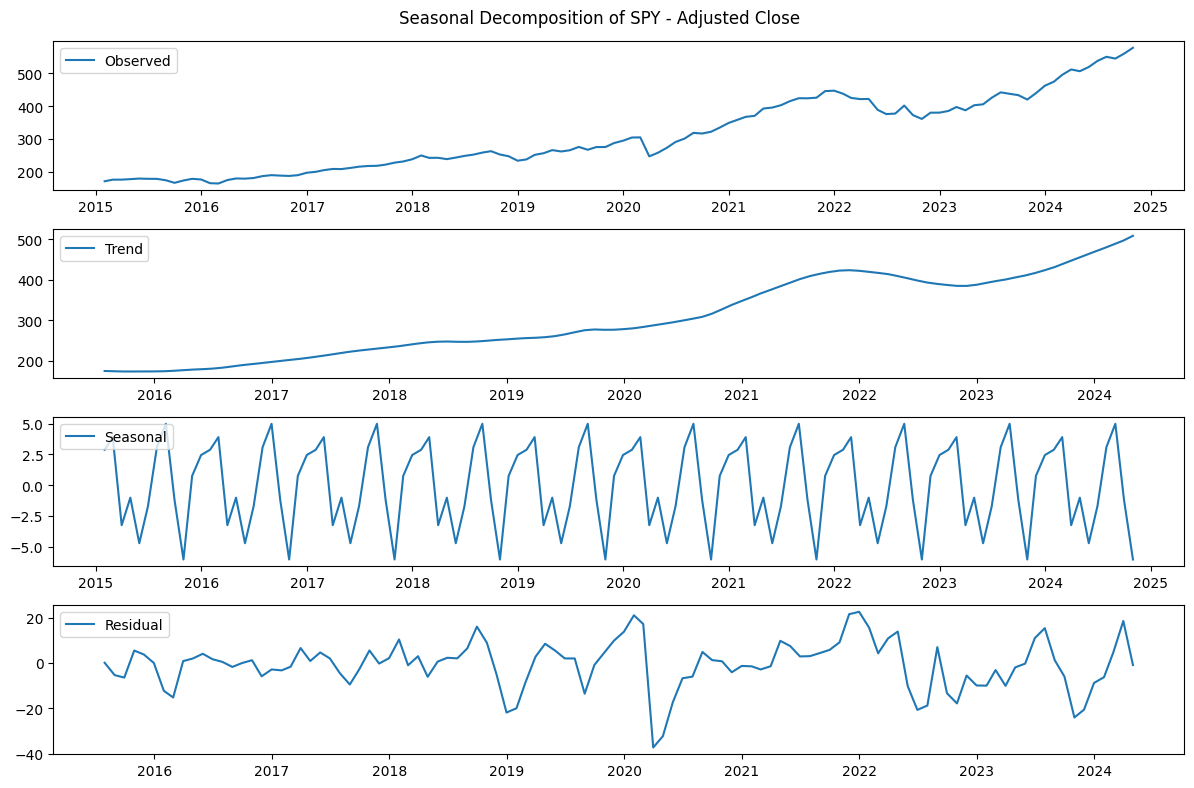

In [28]:
for ticker, df in data.items():
    
    # Resample to monthly frequency if desired, or keep it daily
    df_monthly = df['Adj Close'].resample('M').mean()  # Adjust as needed for your frequency
    
    # Check that there are no missing values before decomposition
    df_monthly = df_monthly.dropna()

    # Perform seasonal decomposition
    decomposition = seasonal_decompose(df_monthly, model='additive')
    
    # Plot the decomposed components
    plt.figure(figsize=(12, 8))
    plt.suptitle(f"Seasonal Decomposition of {ticker} - Adjusted Close")
    
    plt.subplot(411)
    plt.plot(decomposition.observed, label='Observed')
    plt.legend(loc='upper left')

    plt.subplot(412)
    plt.plot(decomposition.trend, label='Trend')
    plt.legend(loc='upper left')

    plt.subplot(413)
    plt.plot(decomposition.seasonal, label='Seasonal')
    plt.legend(loc='upper left')

    plt.subplot(414)
    plt.plot(decomposition.resid, label='Residual')
    plt.legend(loc='upper left')
    
    plt.tight_layout()
    plt.show()
